In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
wine = pd.read_csv('winequality-red.csv')
df = wine.copy()
df1 = df.drop_duplicates()

# 이상치 처리

In [3]:
# 각 열에 대한 임계값 및 상한값 딕셔너리 정의
criteria = {
    'fixed acidity': 12.9,
    'volatile acidity': 1.04,
    'residual sugar': 6.6,
    'total sulfur dioxide': 149.0,
    'sulphates': 1.09
}

In [4]:
# 산점도를 그릴 열 선택
selected_columns = ['fixed acidity', 'volatile acidity', 'residual sugar',
                    'total sulfur dioxide', 'sulphates']

# 각 열에 대해 반복
for column_name in selected_columns:
    # IQR 계산
    Q1 = df1[column_name].quantile(0.25)
    Q3 = df1[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # 이상치 경계 정의
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 임계값 및 상한값 지정
    threshold = criteria[column_name]

    # 이상치에 해당하는 데이터 선택
    red_points = df1[df1[column_name] > threshold]

    # 이상치를 중앙값으로 대체
    df1.loc[red_points.index, column_name] = df1[column_name].median()
    

In [5]:
import matplotlib.pyplot as plt

# 선택할 열들
selected_columns = ['citric acid', 'free sulfur dioxide', 'alcohol']

# 반복문으로 각 열에 대한 이상치를 중앙값으로 대체하고 산점도 그리기
for column_name in selected_columns:
    # IQR 계산
    Q1 = df1[column_name].quantile(0.25)
    Q3 = df1[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # 이상치 경계 정의
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 특정 조건에 맞는 데이터 선택
    red_points = df1[df1[column_name] > upper_bound]
    blue_points = df1[df1[column_name] <= upper_bound]

    # 이상치를 중앙값으로 대체
    df1.loc[red_points.index, column_name] = df1[column_name].median()

In [6]:
# pH

import matplotlib.pyplot as plt

# 선택한 열
column_name = 'pH'

# IQR 계산
Q1 = df1[column_name].quantile(0.25)
Q3 = df1[column_name].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계 정의
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


# 특정 조건에 맞는 데이터 선택
red_points = df1[(df1[column_name] < 2.86) | (df1[column_name] > 3.75)]
green_points = df1[(df1[column_name] > upper_bound) & (df1[column_name] <= 3.75) & (df1[column_name] >= 2.86)]
blue_points = df1[(df1[column_name] <= upper_bound) & (df1[column_name] >= lower_bound)]

# 중앙값으로 이상치 대체
df1.loc[red_points.index, column_name] = df1[column_name].median()


In [7]:
# density

import matplotlib.pyplot as plt

# 선택한 열
column_name = 'density'

# IQR 계산
Q1 = df1[column_name].quantile(0.25)
Q3 = df1[column_name].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계 정의
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


# 특정 조건에 맞는 데이터 선택
red_points = df1[(df1[column_name] < 0.9912) | (df1[column_name] > 1.0022)]
green_points = df1[(df1[column_name] >= 0.9912) & (df1[column_name] <= upper_bound) & (df1[column_name] <= 1.0022)]
blue_points = df1[(df1[column_name] <= upper_bound) & (df1[column_name] >= lower_bound)]

# 중앙값으로 이상치 대체
df1.loc[red_points.index, column_name] = df1[column_name].median()

In [8]:
import matplotlib.pyplot as plt

# 선택한 열
column_name = 'chlorides'

# IQR 계산
Q1 = df1[column_name].quantile(0.25)
Q3 = df1[column_name].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계 정의
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 특정 조건에 맞는 데이터 선택
red_points = df1[df1[column_name] > 0.34]
green_points = df1[(df1[column_name] <= 0.038) | ((df1[column_name] >= 0.123) & (df1[column_name] <= 0.337))]
blue_points = df1[(df1[column_name] >= lower_bound) & (df1[column_name] <= upper_bound)]

# 중앙값으로 이상치 대체
df1.loc[red_points.index, column_name] = df1[column_name].median()

In [9]:
df2 = df1.copy()

In [10]:
df2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# 왜도 & 첨도 총정리

# 차례
- 1. 왜도 & 첨도 계산
- 2. 왜도 & 첨도 판단
- 2.1 boxcox 변환
- 2.2 제곱근 변환
- 2.3 로그 변환
- 3. 왜도 & 첨도 변환
- 3.1 boxcox 변환 (전체)
- 3.2 제곱근 변환 (volatile acidity)
- 3.3 boxcox & 제곱근(alcohol)

#  1. 왜도 & 첨도 계산 (처리 전)

# 개념
- 왜도 : 데이터 분포의 비대칭 정도를 측정. 왜도가 0보다 크면 분포가 오른쪽으로 치우쳐져 있고, 0보다 작으면 왼쪽으로 치우쳐져 있다.
- 첨도 : 데이터 분포의 꼬리의 두께와 중앙 부분의 뾰족함을 측정함. 정규분포의 첨도는 3이고, 이보다 크면 꼬리가 두껍고, 작으면 꼬리가 얇다. 이론적으로 첨도가 3에 가까울수록 데이터가 정규분포에 가깝다고 할 수 있다. (첨도는 0에 더 가깝냐 3에 더 가깝냐 두개로 나뉘는데 두개의 차이는 원래 첨도 식(+3)에서 -3 한것이 0이 되었다. 즉, 파이썬에서는 3을 빼준식으로 적용을 했기에 0에 더 가까운걸 찾으면 된다.)

=== 왜도 결과 ===
fixed acidity           0.690510
volatile acidity        0.408120
citric acid             0.287387
residual sugar          2.363971
chlorides               3.432842
free sulfur dioxide     0.790797
total sulfur dioxide    1.122658
density                -0.027257
pH                      0.028089
sulphates               0.871487
alcohol                 0.740082
dtype: float64

=== 첨도 결과 ===
fixed acidity            0.133181
volatile acidity        -0.148819
citric acid             -0.884578
residual sugar           6.854727
chlorides               19.049222
free sulfur dioxide     -0.146034
total sulfur dioxide     0.722018
density                  0.280832
pH                       0.082224
sulphates                0.709980
alcohol                 -0.298483
dtype: float64


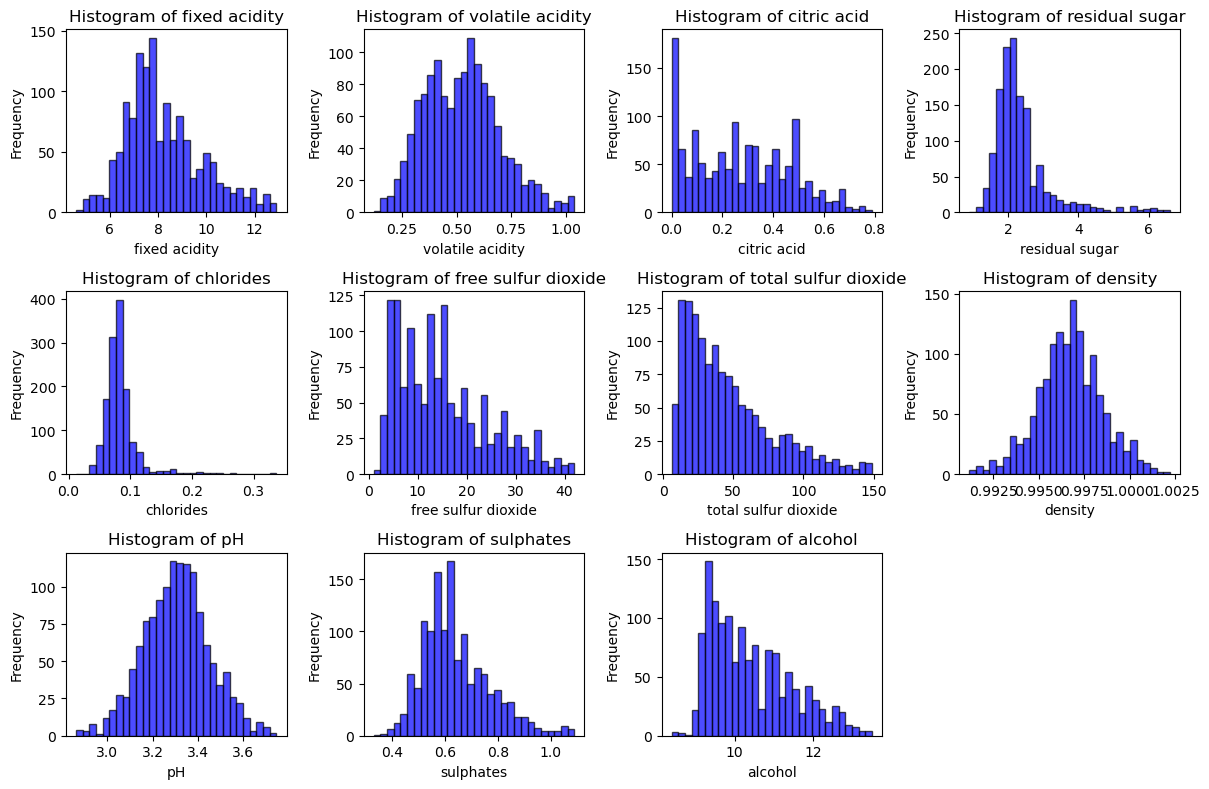

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# 'df2'는 이상치를 대체한 데이터프레임 이름입니다. 실제 데이터프레임의 이름에 따라 수정해야 합니다.
df2_A = df2.drop('quality', axis=1)  # 'quality' 열을 제외한 변수만 포함하는 새로운 데이터프레임 생성

# 왜도와 첨도 계산
왜도_결과 = df2_A.skew()
첨도_결과 = df2_A.kurtosis()

# 결과 출력
print("=== 왜도 결과 ===")
print(왜도_결과)

print("\n=== 첨도 결과 ===")
print(첨도_결과)

# 히스토그램 그리기
plt.figure(figsize=(12, 8))

for idx, column in enumerate(df2_A.columns):
    plt.subplot(3, 4, idx + 1)
    plt.hist(df2_A[column], bins=30, color='blue', edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


* 왜도 결과
- fixed acidity (고정 산도): 양수의 왜도가 나타남으로써 오른쪽으로 치우친 분포를 나타냄.
- volatile acidity (휘발성 산도): 양수의 왜도로 오른쪽으로 치우친 분포를 나타냄.
- citric acid (구연산): 양수의 왜도로 오른쪽으로 치우친 분포를 나타냄.
- residual sugar (잔류 설탕): 양수의 왜도로 오른쪽으로 치우친 분포를 나타냄.
- chlorides (염화물): 양수의 왜도로 오른쪽으로 치우친 분포를 나타냄.
- free sulfur dioxide (자유 이산화황): 양수의 왜도로 오른쪽으로 치우친 분포를 나타냄.
- total sulfur dioxide (총 이산화황): 양수의 왜도로 오른쪽으로 치우친 분포를 나타냄.
- density (밀도): 왜도가 거의 0에 가깝기 때문에 비교적 대칭에 가까운 분포를 나타냄.
- pH (산도): 왜도가 거의 0에 가깝기 때문에 비교적 대칭에 가까운 분포를 나타냄.
- sulphates (황산염): 양수의 왜도로 오른쪽으로 치우친 분포를 나타냄.
- alcohol (알코올): 양수의 왜도로 오른쪽으로 치우친 분포를 나타냄.
------------------------------------------------------------------------------
* 첨도 결과:
- fixed acidity (고정 산도): 첨도가 양수이므로 뾰족한 꼬리를 가진 분포를 나타냄.
- volatile acidity (휘발성 산도): 첨도가 음수이므로 꼬리가 두툼한 분포를 나타냄.
- citric acid (구연산): 첨도가 음수이므로 꼬리가 두툼한 분포를 나타냄.
- residual sugar (잔류 설탕): 첨도가 양수이므로 뾰족한 꼬리를 가진 분포를 나타냄.
- chlorides (염화물): 매우 높은 양수의 첨도로 뾰족한 꼬리를 가진 분포를 나타냄.
- free sulfur dioxide (자유 이산화황): 첨도가 음수이므로 꼬리가 두툼한 분포를 나타냄.
- total sulfur dioxide (총 이산화황): 첨도가 양수이므로 뾰족한 꼬리를 가진 분포를 나타냄.
- density (밀도): 첨도가 양수이므로 뾰족한 꼬리를 가진 분포를 나타냄.
- pH (산도): 첨도가 양수이므로 뾰족한 꼬리를 가진 분포를 나타냄.
- sulphates (황산염): 첨도가 양수이므로 뾰족한 꼬리를 가진 분포를 나타냄.
- alcohol (알코올): 첨도가 음수이므로 꼬리가 두툼한 분포를 나타냄.

# 2. 왜도 & 첨도 판단

# 2.1 boxcox 변환

- 주의할 점 : boxcox 변환은 양의 값을 갖는 데이터에 적합하며, 0이하의 값이 있는 경우에는 1을 더하여 변환한다.(critic acid)

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import boxcox

# 데이터프레임 생성
# df1 = ...

# 'quality' 열 제외
df2_A = df2.drop('quality', axis=1)

# 'citric acid'에 1e-6 추가
df2_A['citric acid'] += 1e-6

# Box-Cox 변환 수행
df2_A_boxcox = pd.DataFrame()
for column in df2_A.columns:
    # Box-Cox 변환
    transformed_data, lambda_value = boxcox(df2_A[column])
    df2_A_boxcox[column] = transformed_data

# 각 열에 대해 왜도와 첨도 계산
skewness_result_before = df2_A.skew()
kurtosis_result_before = df2_A.kurtosis()
skewness_result_after = df2_A_boxcox.skew()
kurtosis_result_after = df2_A_boxcox.kurtosis()

# 결과 출력
print("=== 왜도 결과 (Box-Cox 변환 전 vs. 후) ===")
comparison_skewness = pd.DataFrame({
    'Before Transformation': skewness_result_before,
    'After Transformation': skewness_result_after
})
print(comparison_skewness)

print("\n=== 첨도 결과 (Box-Cox 변환 전 vs. 후) ===")
comparison_kurtosis = pd.DataFrame({
    'Before Transformation': kurtosis_result_before,
    'After Transformation': kurtosis_result_after
})
print(comparison_kurtosis)


=== 왜도 결과 (Box-Cox 변환 전 vs. 후) ===
                      Before Transformation  After Transformation
fixed acidity                      0.690510              0.002815
volatile acidity                   0.408120             -0.021598
citric acid                        0.287387             -0.814111
residual sugar                     2.363971             -0.062453
chlorides                          3.432842             -0.173657
free sulfur dioxide                0.790797             -0.038509
total sulfur dioxide               1.122658             -0.014487
density                           -0.027257              0.000911
pH                                 0.028089              0.000997
sulphates                          0.871487              0.002571
alcohol                            0.740082              0.106919

=== 첨도 결과 (Box-Cox 변환 전 vs. 후) ===
                      Before Transformation  After Transformation
fixed acidity                      0.133181             -0.071655
volat

# 2.2 제곱근 변환

- 이 코드는 먼저 원본 데이터에 대한 왜도와 첨도를 출력하고, 그 다음 제곱근 변환을 적용한 후의 왜도와 첨도를 출력합니다. 또한 변환 전과 후의 히스토그램을 시각적으로 비교합니다.

- 제곱근 변환은 양수의 왜도를 갖는 데이터를 상당히 정규분포에 가깝게 만들 수 있는 간단한 방법 중 하나입니다. 그러나 데이터의 특성에 따라 다른 변환을 사용하는 것이 더 적합할 수 있습니다.

In [20]:
import matplotlib.pyplot as plt
import pandas as pd


df2_A = df2.drop('quality', axis=1)  # 'quality' 열을 제외한 변수만 포함하는 새로운 데이터프레임 생성


df2_A_sqrt = df2_A.apply(lambda x: x**0.5)  # 제곱근 변환

# 각 열에 대해 왜도와 첨도 계산
skewness_result_before = df2_A.skew()
kurtosis_result_before = df2_A.kurtosis()
skewness_result_after = df2_A_sqrt.skew()
kurtosis_result_after = df2_A_sqrt.kurtosis()

# 결과 출력
print("=== 왜도 결과 (제곱근 변환 전 vs. 후) ===")
comparison_skewness = pd.DataFrame({
    'Before Transformation': skewness_result_before,
    'After Transformation': skewness_result_after
})
print(comparison_skewness)

print("\n=== 첨도 결과 (제곱근 변환 전 vs. 후) ===")
comparison_kurtosis = pd.DataFrame({
    'Before Transformation': kurtosis_result_before,
    'After Transformation': kurtosis_result_after
})
print(comparison_kurtosis)

=== 왜도 결과 (제곱근 변환 전 vs. 후) ===
                      Before Transformation  After Transformation
fixed acidity                      0.690510              0.453425
volatile acidity                   0.408120              0.002380
citric acid                        0.287387             -0.552845
residual sugar                     2.363971              1.731040
chlorides                          3.432842              2.047429
free sulfur dioxide                0.790797              0.274546
total sulfur dioxide               1.122658              0.517002
density                           -0.027257             -0.030283
pH                                 0.028089             -0.042168
sulphates                          0.871487              0.603889
alcohol                            0.740082              0.659052

=== 첨도 결과 (제곱근 변환 전 vs. 후) ===
                      Before Transformation  After Transformation
fixed acidity                      0.133181             -0.089391
volatile acid

# 2.3 로그 변환

- 주의할 점 : 0이하의 값이 있는 경우에는 1을 더하여 변환한다.(critic acid)

In [21]:
import numpy as np
import pandas as pd

df2_A = df2.drop('quality', axis=1)  # 'quality' 열을 제외한 변수만 포함하는 새로운 데이터프레임 생성

df2_A_log = df2_A.apply(lambda x: np.log1p(x))  # 로그 변환

# 각 열에 대해 왜도와 첨도 계산
skewness_result_before = df2_A.skew()
kurtosis_result_before = df2_A.kurtosis()
skewness_result_after = df2_A_log.skew()
kurtosis_result_after = df2_A_log.kurtosis()

# 결과 출력
print("=== 왜도 결과 (로그 변환 전 vs. 후) ===")
comparison_skewness = pd.DataFrame({
    'Before Transformation': skewness_result_before,
    'After Transformation': skewness_result_after
})
print(comparison_skewness)

print("\n=== 첨도 결과 (로그 변환 전 vs. 후) ===")
comparison_kurtosis = pd.DataFrame({
    'Before Transformation': kurtosis_result_before,
    'After Transformation': kurtosis_result_after
})
print(comparison_kurtosis)

=== 왜도 결과 (로그 변환 전 vs. 후) ===
                      Before Transformation  After Transformation
fixed acidity                      0.690510              0.260592
volatile acidity                   0.408120              0.138489
citric acid                        0.287387              0.068019
residual sugar                     2.363971              1.438817
chlorides                          3.432842              3.106219
free sulfur dioxide                0.790797             -0.193891
total sulfur dioxide               1.122658             -0.078491
density                           -0.027257             -0.030277
pH                                 0.028089             -0.079822
sulphates                          0.871487              0.656345
alcohol                            0.740082              0.593282

=== 첨도 결과 (로그 변환 전 vs. 후) ===
                      Before Transformation  After Transformation
fixed acidity                      0.133181             -0.161114
volatile acidit

- 1. 판단 방법: 왜도 값이 0에 가까운걸 찾는다 / 첨도 결과 값이 0에 가까운걸 찾는다 / 2개의 결과를 비교하여 왜도 첨도 변환을 진행한다.
----------------------------------------------------------------------------
- 2. 결과: boxcox 변환 (전체)
- 3.2 boxcox & 제곱근 (volatile acidity,alcohol)

# 3. 왜도 & 첨도 변환

# 3.1 boxcox 변환 (전체)

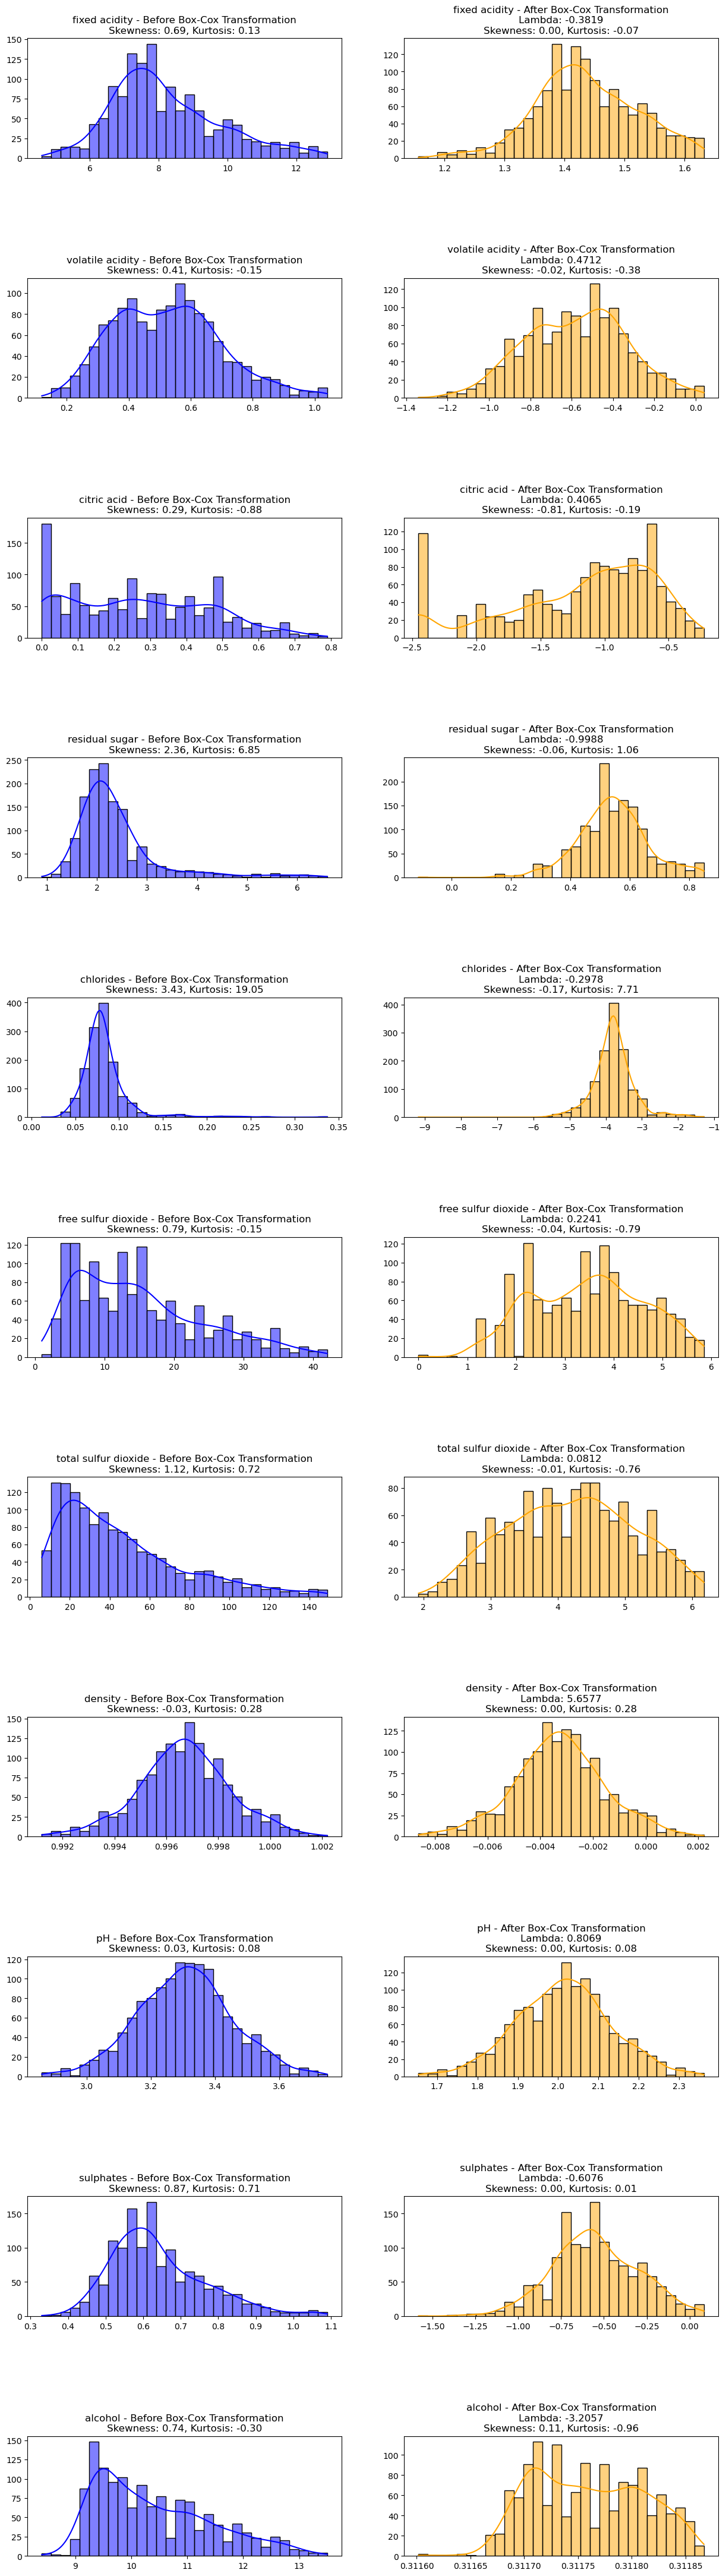

In [25]:
import numpy as np
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import seaborn as sns

# 'citric acid' 열만 1을 더한 후 Box-Cox 변환 수행
df2_A_boxcox = pd.DataFrame()
lambda_values = []

for column in df2_A.columns:
    # 'citric acid' 열인 경우에만 1을 더하고 Box-Cox 변환 
    if column == 'citric acid':
        transformed_data, lambda_value = boxcox(df2_A[column] + 1e-6)
    else:
        transformed_data, lambda_value = boxcox(df2_A[column])
    
    df2_A_boxcox[column] = transformed_data
    lambda_values.append(lambda_value)

# 시각화를 위해 변환 후의 데이터프레임 생성
df2_A_boxcox.columns = df2_A.columns

# 시각화
fig, axes = plt.subplots(len(df2_A.columns), 2, figsize=(15, 5 * len(df2_A.columns)))
fig.subplots_adjust(hspace=1.0)

# 각 변수에 대한 히스토그램 그리기
for i, column in enumerate(df2_A.columns):
    # Box-Cox 변환 전
    sns.histplot(df2_A[column], bins=30, kde=True, color='blue', ax=axes[i, 0])
    axes[i, 0].set_title(f"{column} - Before Box-Cox Transformation\nSkewness: {skewness_result_before[column]:.2f}, Kurtosis: {kurtosis_result_before[column]:.2f}")
    axes[i, 0].set_xlabel('')
    axes[i, 0].set_ylabel('')
    
    # Box-Cox 변환 후
    sns.histplot(df2_A_boxcox[column], bins=30, kde=True, color='orange', ax=axes[i, 1])
    axes[i, 1].set_title(f"{column} - After Box-Cox Transformation\nLambda: {lambda_values[i]:.4f}\nSkewness: {df2_A_boxcox[column].skew():.2f}, Kurtosis: {df2_A_boxcox[column].kurtosis():.2f}")
    axes[i, 1].set_xlabel('')
    axes[i, 1].set_ylabel('')

plt.show()


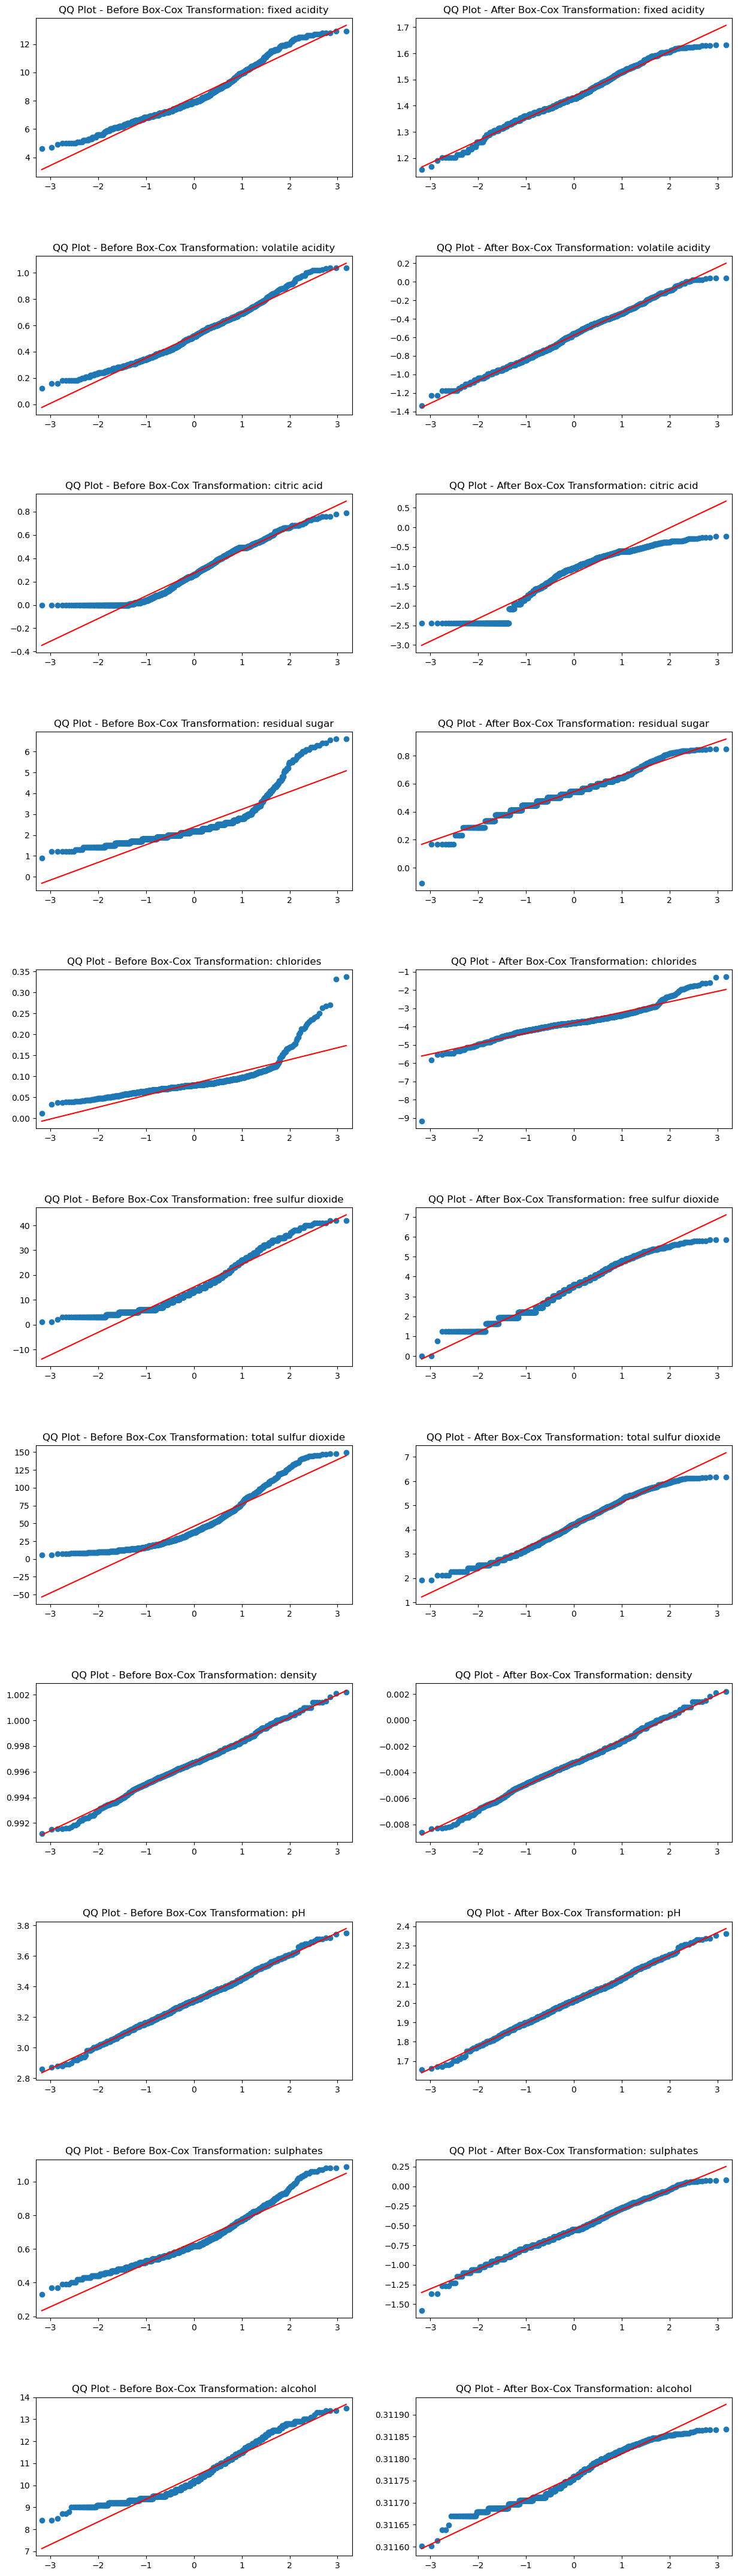

In [28]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Box-Cox 변환 후의 데이터프레임에 대한 QQ plot 그리기
fig, axes = plt.subplots(len(df2_A_boxcox.columns), 2, figsize=(15, 5 * len(df2_A_boxcox.columns)))
fig.subplots_adjust(hspace=0.5)

# 각 변수에 대한 QQ plot 그리기
for i, column in enumerate(df2_A_boxcox.columns):
    # 'citric acid' 열인 경우에만 1을 더하고 Box-Cox 변환 
    if column == 'citric acid':
        sm.qqplot(df2_A[column] + 1e-6, line='s', ax=axes[i, 0])
    else:
        sm.qqplot(df2_A[column], line='s', ax=axes[i, 0])
        
    axes[i, 0].set_title(f"QQ Plot - Before Box-Cox Transformation: {column}")
    axes[i, 0].set_xlabel('')
    axes[i, 0].set_ylabel('')

    # Box-Cox 변환 후
    sm.qqplot(df2_A_boxcox[column], line='s', ax=axes[i, 1])
    axes[i, 1].set_title(f"QQ Plot - After Box-Cox Transformation: {column}")
    axes[i, 1].set_xlabel('')
    axes[i, 1].set_ylabel('')

plt.show()


In [29]:
# Shapiro-Wilk 정규성 검정이 수행

from scipy.stats import shapiro
import numpy as np

# 'citric acid' 열만 1을 더한 후 Box-Cox 변환 수행
df2_A_boxcox = pd.DataFrame()
lambda_values = []

for column in df2_A.columns:
    # 'citric acid' 열인 경우에만 1e-6을 더하고 Box-Cox 변환
    if column == 'citric acid':
        transformed_data, lambda_value = boxcox(df2_A[column] +1e-6 )
    else:
        transformed_data, lambda_value = boxcox(df2_A[column])
    
    df2_A_boxcox[column] = transformed_data
    lambda_values.append(lambda_value)

# Shapiro-Wilk 정규성 검정 수행
for column in df2_A.columns:
    _, p_before = shapiro(df2_A[column])
    _, p_after = shapiro(df2_A_boxcox[column])
    
    print(f"{column}:")
    print(f"  - Before Box-Cox Transformation: p-value = {p_before:.4f}")
    print(f"  - After Box-Cox Transformation: p-value = {p_after:.4f}")
    print()


fixed acidity:
  - Before Box-Cox Transformation: p-value = 0.0000
  - After Box-Cox Transformation: p-value = 0.0000

volatile acidity:
  - Before Box-Cox Transformation: p-value = 0.0000
  - After Box-Cox Transformation: p-value = 0.0005

citric acid:
  - Before Box-Cox Transformation: p-value = 0.0000
  - After Box-Cox Transformation: p-value = 0.0000

residual sugar:
  - Before Box-Cox Transformation: p-value = 0.0000
  - After Box-Cox Transformation: p-value = 0.0000

chlorides:
  - Before Box-Cox Transformation: p-value = 0.0000
  - After Box-Cox Transformation: p-value = 0.0000

free sulfur dioxide:
  - Before Box-Cox Transformation: p-value = 0.0000
  - After Box-Cox Transformation: p-value = 0.0000

total sulfur dioxide:
  - Before Box-Cox Transformation: p-value = 0.0000
  - After Box-Cox Transformation: p-value = 0.0000

density:
  - Before Box-Cox Transformation: p-value = 0.0012
  - After Box-Cox Transformation: p-value = 0.0014

pH:
  - Before Box-Cox Transformation: p-va

# 3.2 boxcox & 제곱근(volatile acidity,alcohol)

- 원래 volatile acidity는 왜도&첨도 결과값 비교에 따라 제곱근 변화만 할려고 하였으나 hapiro-Wilk 정규성 검정이 수행을 보면 boxcox가 더 정규성에 맞는것 같다고 판단. 하지만 일단 제곱근 변환도 실행해보겠다.
- alcohol은 왜도 첨도값 이 비교를 하였을때 차이가 별로 발생을 하지 않아 둘다 실행해 보기로 하였다. 

# 3.2(1) volatile acidity

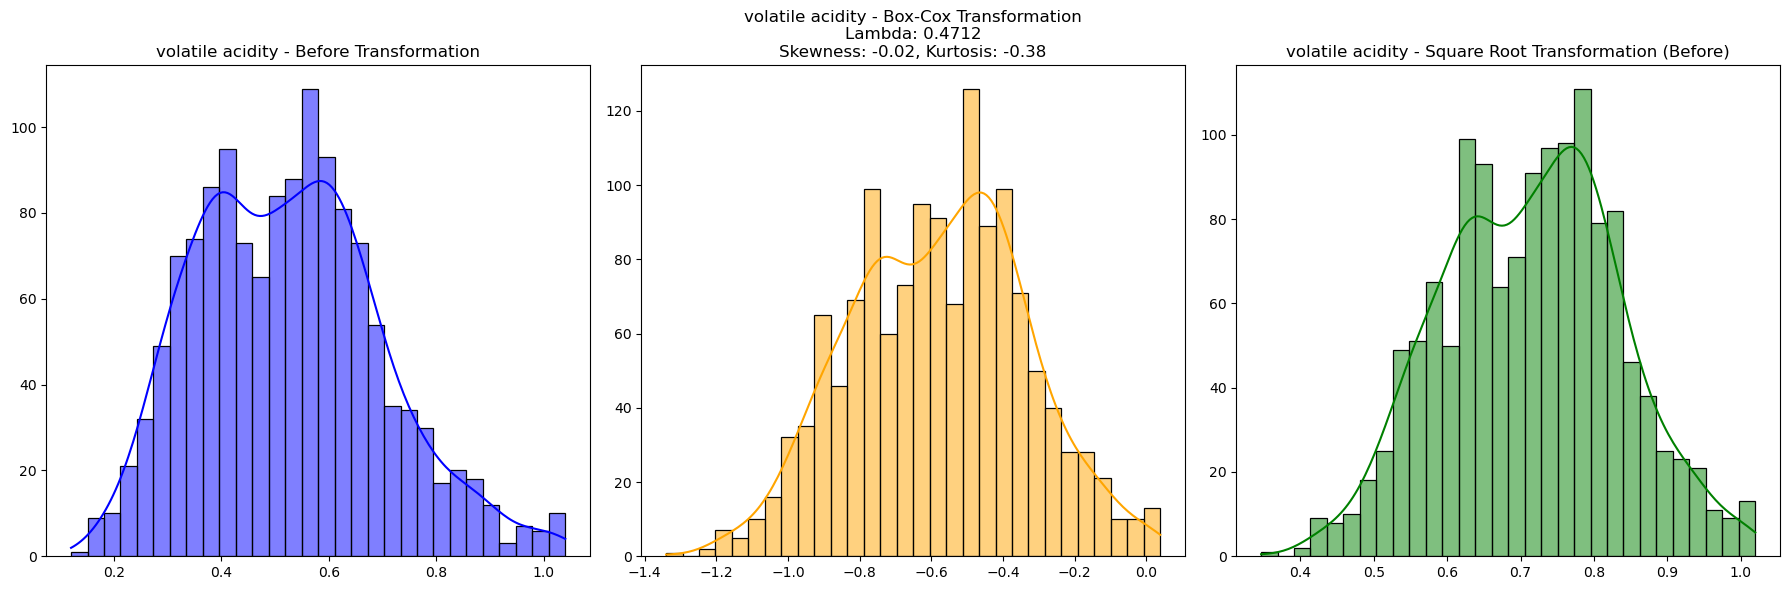

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox

# 선택한 열
column_name = 'volatile acidity'

# 그래프 크기 설정
plt.figure(figsize=(18, 6))

# Box-Cox 변환 전
plt.subplot(1, 3, 1)
sns.histplot(df2_A[column_name], bins=30, kde=True, color='blue')
plt.title(f"{column_name} - Before Transformation")
plt.xlabel('')
plt.ylabel('')

# Box-Cox 변환 후
plt.subplot(1, 3, 2)
transformed_data_boxcox, lambda_value_boxcox = boxcox(df2_A[column_name])  
sns.histplot(transformed_data_boxcox, bins=30, kde=True, color='orange')
plt.title(f"{column_name} - Box-Cox Transformation\nLambda: {lambda_value_boxcox:.4f}\nSkewness: {pd.Series(transformed_data_boxcox).skew():.2f}, Kurtosis: {pd.Series(transformed_data_boxcox).kurtosis():.2f}")
plt.xlabel('')
plt.ylabel('')

# 제곱근 변환 전
plt.subplot(1, 3, 3)
sns.histplot(df2_A[column_name]**0.5, bins=30, kde=True, color='green')
plt.title(f"{column_name} - Square Root Transformation (Before)")
plt.xlabel('')
plt.ylabel('')

plt.tight_layout()  # 서브플롯 간 간격 조절
plt.show()


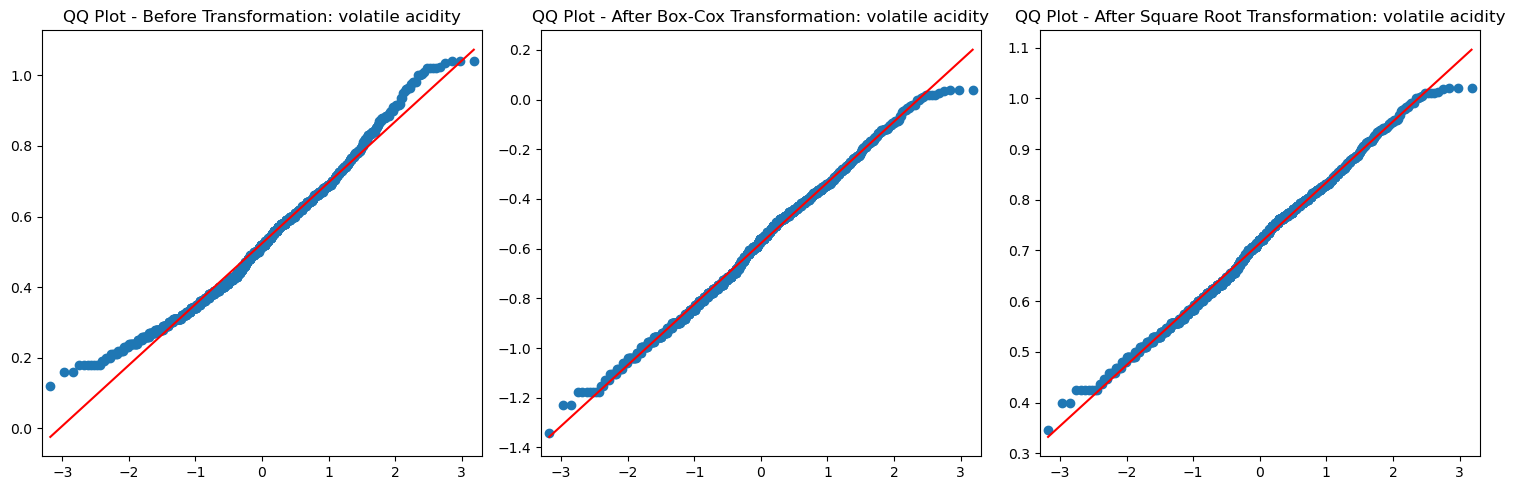

In [31]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import boxcox

# 선택한 열
column_name = 'volatile acidity'

# Box-Cox 변환 전의 데이터
transformed_data_boxcox, _ = boxcox(df2_A[column_name] )  

# 제곱근 변환 후의 데이터
transformed_data_sqrt = df2_A[column_name].apply(lambda x: x**0.5)  # 제곱근 변환

# QQ plot 그리기
plt.figure(figsize=(15, 5))

# 변환 전 QQ plot
ax1 = plt.subplot(1, 3, 1)
sm.qqplot(df2_A[column_name], line='s', ax=ax1)
ax1.set_title(f"QQ Plot - Before Transformation: {column_name}")
ax1.set_xlabel('')
ax1.set_ylabel('')

# Box-Cox 변환 후 QQ plot
ax2 = plt.subplot(1, 3, 2)
sm.qqplot(transformed_data_boxcox, line='s', ax=ax2)
ax2.set_title(f"QQ Plot - After Box-Cox Transformation: {column_name}")
ax2.set_xlabel('')
ax2.set_ylabel('')

# 제곱근 변환 후 QQ plot
ax3 = plt.subplot(1, 3, 3)
sm.qqplot(transformed_data_sqrt, line='s', ax=ax3)
ax3.set_title(f"QQ Plot - After Square Root Transformation: {column_name}")
ax3.set_xlabel('')
ax3.set_ylabel('')

# 겹치는 축 제거
plt.tight_layout()
plt.show()



In [32]:
from scipy.stats import shapiro

# 'volatile acidity' 선택
column_name = 'volatile acidity'

# Box-Cox 변환
transformed_data_boxcox, _ = boxcox(df2_A[column_name])  

# 제곱근 변환
transformed_data_sqrt = df2_A[column_name].apply(lambda x: x**0.5)  # 제곱근 변환

# Shapiro-Wilk 정규성 검정
_, p_before = shapiro(df2_A[column_name])
_, p_boxcox = shapiro(transformed_data_boxcox)
_, p_sqrt = shapiro(transformed_data_sqrt)

# 결과 출력
print(f"Shapiro-Wilk 정규성 검정 결과 - {column_name}:")
print(f"  - Before Transformation: p-value = {p_before:.4f}")
print(f"  - After Box-Cox Transformation: p-value = {p_boxcox:.4f}")
print(f"  - After Square Root Transformation: p-value = {p_sqrt:.4f}")


Shapiro-Wilk 정규성 검정 결과 - volatile acidity:
  - Before Transformation: p-value = 0.0000
  - After Box-Cox Transformation: p-value = 0.0005
  - After Square Root Transformation: p-value = 0.0004


# 3.2(2) alcohol

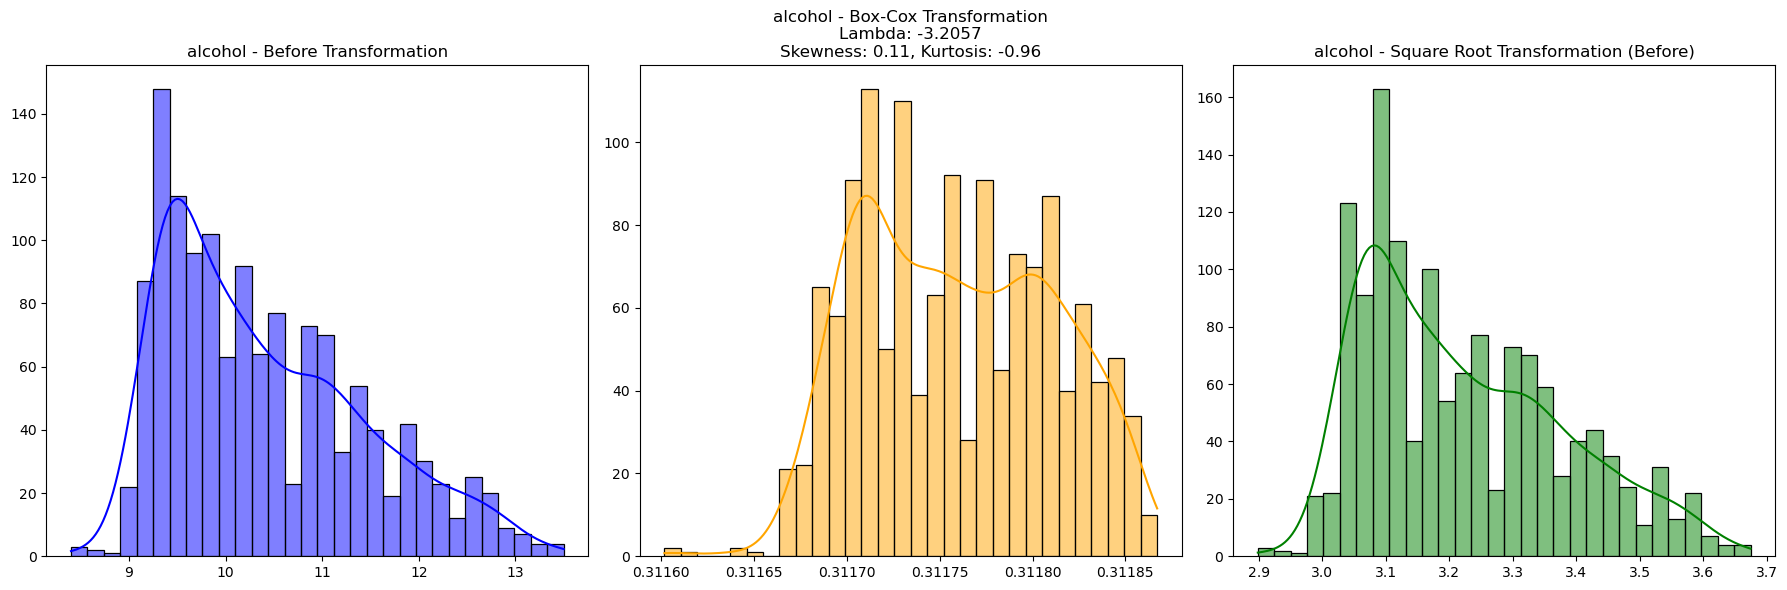

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox

# 선택한 열
column_name = 'alcohol'

# 그래프 크기 설정
plt.figure(figsize=(18, 6))

# Box-Cox 변환 전
plt.subplot(1, 3, 1)
sns.histplot(df2_A[column_name], bins=30, kde=True, color='blue')
plt.title(f"{column_name} - Before Transformation")
plt.xlabel('')
plt.ylabel('')

# Box-Cox 변환 후
plt.subplot(1, 3, 2)
transformed_data_boxcox, lambda_value_boxcox = boxcox(df2_A[column_name])  
sns.histplot(transformed_data_boxcox, bins=30, kde=True, color='orange')
plt.title(f"{column_name} - Box-Cox Transformation\nLambda: {lambda_value_boxcox:.4f}\nSkewness: {pd.Series(transformed_data_boxcox).skew():.2f}, Kurtosis: {pd.Series(transformed_data_boxcox).kurtosis():.2f}")
plt.xlabel('')
plt.ylabel('')

# 제곱근 변환 전
plt.subplot(1, 3, 3)
sns.histplot(df2_A[column_name]**0.5, bins=30, kde=True, color='green')
plt.title(f"{column_name} - Square Root Transformation (Before)")
plt.xlabel('')
plt.ylabel('')

plt.tight_layout()  # 서브플롯 간 간격 조절
plt.show()


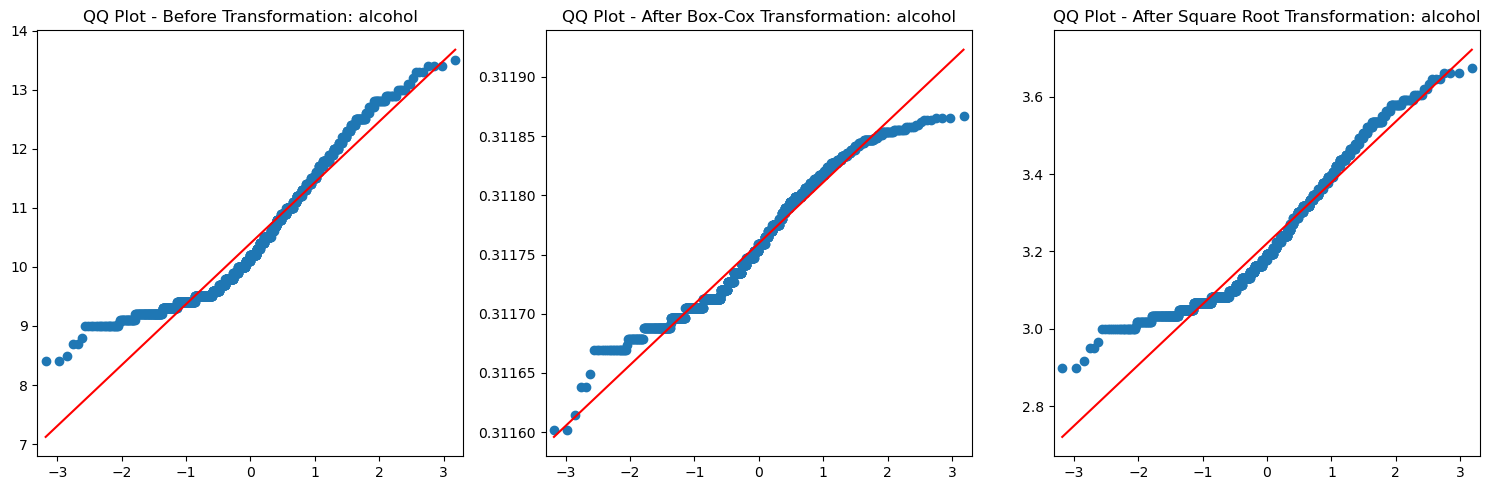

In [34]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import boxcox

# 선택한 열
column_name = 'alcohol'

# Box-Cox 변환 전의 데이터
transformed_data_boxcox, _ = boxcox(df2_A[column_name] )  

# 제곱근 변환 후의 데이터
transformed_data_sqrt = df2_A[column_name].apply(lambda x: x**0.5)  # 제곱근 변환

# QQ plot 그리기
plt.figure(figsize=(15, 5))

# 변환 전 QQ plot
ax1 = plt.subplot(1, 3, 1)
sm.qqplot(df2_A[column_name], line='s', ax=ax1)
ax1.set_title(f"QQ Plot - Before Transformation: {column_name}")
ax1.set_xlabel('')
ax1.set_ylabel('')

# Box-Cox 변환 후 QQ plot
ax2 = plt.subplot(1, 3, 2)
sm.qqplot(transformed_data_boxcox, line='s', ax=ax2)
ax2.set_title(f"QQ Plot - After Box-Cox Transformation: {column_name}")
ax2.set_xlabel('')
ax2.set_ylabel('')

# 제곱근 변환 후 QQ plot
ax3 = plt.subplot(1, 3, 3)
sm.qqplot(transformed_data_sqrt, line='s', ax=ax3)
ax3.set_title(f"QQ Plot - After Square Root Transformation: {column_name}")
ax3.set_xlabel('')
ax3.set_ylabel('')

# 겹치는 축 제거
plt.tight_layout()
plt.show()


In [35]:
from scipy.stats import shapiro

# 'volatile acidity' 선택
column_name = 'alcohol'

# Box-Cox 변환
transformed_data_boxcox, _ = boxcox(df2_A[column_name])  

# 제곱근 변환
transformed_data_sqrt = df2_A[column_name].apply(lambda x: x**0.5)  # 제곱근 변환

# Shapiro-Wilk 정규성 검정
_, p_before = shapiro(df2_A[column_name])
_, p_boxcox = shapiro(transformed_data_boxcox)
_, p_sqrt = shapiro(transformed_data_sqrt)

# 결과 출력
print(f"Shapiro-Wilk 정규성 검정 결과 - {column_name}:")
print(f"  - Before Transformation: p-value = {p_before:.4f}")
print(f"  - After Box-Cox Transformation: p-value = {p_boxcox:.4f}")
print(f"  - After Square Root Transformation: p-value = {p_sqrt:.4f}")

Shapiro-Wilk 정규성 검정 결과 - alcohol:
  - Before Transformation: p-value = 0.0000
  - After Box-Cox Transformation: p-value = 0.0000
  - After Square Root Transformation: p-value = 0.0000


# df3

In [36]:
df3 = df2_A.copy()

In [37]:
df3

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.000001,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.000001,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.040001,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.560001,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
5,7.4,0.660,0.000001,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.080001,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1594,6.2,0.600,0.080001,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.100001,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1597,5.9,0.645,0.120001,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2
